In [1]:
import pandas as pd
import numpy as np
data = pd.read_excel("/content/Preliminary college year.xlsx")
data

,High School GPA,SAT Score,Federal Ethnic Group,Gender,"Pell Grant Eligible? (1=yes, 0=no)","Attended Orientation? (1=yes, 0=no)","Attended Experience Day? (1=yes, 0=no)","Resident/Commuter (1=resident, 0=commuter)","Athlete? (1=yes, 0=no)","Completed Summer Bridge? (2=completed all, 1=completed at least half, 0=did not complete)",...,Number of Peer Mentor Meetings Attended,Number of Workshops Attended,F17 GPA,S18 GPA,CUM GPA,Number of Credits Earned,"Completed Connect? (1=yes, 0=no)",Reason for not Completing Connect,"Retained F17-F18? (1=yes, 0=no)",Reason not Retained
0,2.595,970.0,White,F,0.0,1.0,0.0,1.0,1.0,2.0,...,2.0,2.0,0.660,2.200,1.788,18.0,0,academic dismissal after S18 semester,0.0,academic dismissal after S18 semester
1,2.637,1020.0,White,F,0.0,1.0,0.0,1.0,1.0,2.0,...,1.0,2.0,1.567,1.660,1.625,18.0,0,academic dismissal after S18 semester,0.0,academic dismissal after S18 semester
2,2.803,930.0,Black/African American,F,1.0,1.0,1.0,1.0,0.0,1.0,...,2.0,3.0,2.425,2.250,2.338,24.0,1,NaN,0.0,financial
3,2.354,1080.0,Hispanic/Latino,M,0.0,1.0,1.0,1.0,0.0,1.0,...,2.0,0.0,0.925,NaN,NaN,6.0,0,academic dismissal after F17 semester,0.0,academic dismissal after F17 semester
4,2.850,880.0,White,F,1.0,1.0,1.0,0.0,0.0,2.0,...,3.0,3.0,3.200,1.680,2.250,18.0,1,NaN,1.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103,2.319,950.0,White,M,1.0,1.0,1.0,1.0,1.0,1.0,...,3.0,1.0,1.925,1.740,1.822,24.0,1,NaN,1.0,NaN
104,2.021,1140.0,White,M,0.0,1.0,1.0,1.0,0.0,2.0,...,5.0,3.0,1.660,1.825,1.950,21.0,1,NaN,1.0,NaN
105,2.139,1110.0,Black/African American,M,0.0,1.0,1.0,1.0,0.0,2.0,...,0.0,0.0,NaN,NaN,NaN,0.0,0,conduct,0.0,conduct
106,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108 entries, 0 to 107
Data columns (total 33 columns):
 #   Column                                                                                     Non-Null Count  Dtype  
---  ------                                                                                     --------------  -----  
 0   High School GPA                                                                            106 non-null    float64
 1   SAT Score                                                                                  102 non-null    float64
 2   Federal Ethnic Group                                                                       106 non-null    object 
 3   Gender                                                                                     106 non-null    object 
 4   Pell Grant Eligible? (1=yes, 0=no)                                                         106 non-null    float64
 5   Attended Orientation? (1=yes, 0=no)               

In [3]:
data.describe()

,High School GPA,SAT Score,"Pell Grant Eligible? (1=yes, 0=no)","Attended Orientation? (1=yes, 0=no)","Attended Experience Day? (1=yes, 0=no)","Resident/Commuter (1=resident, 0=commuter)","Athlete? (1=yes, 0=no)","Completed Summer Bridge? (2=completed all, 1=completed at least half, 0=did not complete)",Dropout Proneness (percentile score before start of semester),Predicted Academic Difficulty (percentile score before start of semester),...,"Completed Campus Event Requirement? (1=yes, 0=no)","Completed Community Service Requirement? (1=yes, 0=no)",Number of Faculty Advisor Meetings Attended,Number of Peer Mentor Meetings Attended,Number of Workshops Attended,F17 GPA,S18 GPA,CUM GPA,Number of Credits Earned,"Retained F17-F18? (1=yes, 0=no)"
count,106.000000,102.000000,106.000000,106.000000,105.000000,106.000000,106.000000,106.000000,93.000000,93.000000,...,106.000000,106.000000,107.000000,106.000000,106.000000,104.000000,87.000000,87.000000,106.000000,106.000000
mean,2.518443,984.509804,0.584906,0.981132,0.866667,0.905660,0.235849,1.707547,71.623656,72.268817,...,0.698113,0.820755,5.196262,2.764151,3.075472,2.466644,2.436897,2.572368,21.481132,0.622642
std,0.267150,85.592026,0.495079,0.136705,0.341565,0.293689,0.426545,0.568490,22.956440,21.885641,...,0.461257,0.385380,26.671460,1.489979,6.511087,1.009796,0.907564,0.679156,9.006063,0.487029
min,2.011000,810.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,13.000000,17.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.750000,0.000000,0.000000
25%,2.320000,930.000000,0.000000,1.000000,1.000000,1.000000,0.000000,2.000000,57.000000,59.000000,...,0.000000,1.000000,2.000000,2.000000,1.000000,2.000000,1.812500,2.170000,18.000000,0.000000
50%,2.519000,970.000000,1.000000,1.000000,1.000000,1.000000,0.000000,2.000000,80.000000,77.000000,...,1.000000,1.000000,2.000000,3.000000,3.000000,2.775000,2.575000,2.644000,24.000000,1.000000
75%,2.744750,1040.000000,1.000000,1.000000,1.000000,1.000000,0.000000,2.000000,91.000000,91.000000,...,1.000000,1.000000,3.000000,3.750000,3.000000,3.167250,3.100000,3.001500,27.000000,1.000000
max,3.163000,1320.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,99.000000,99.000000,...,1.000000,1.000000,278.000000,8.000000,68.000000,3.900000,4.000000,3.930000,33.000000,1.000000


In [4]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import roc_curve, auc

In [5]:
target = 'Retained F17-F18? (1=yes, 0=no)'  # Assuming this column represents passing the preliminary year
data = data.dropna(subset=[target])
X = data.drop(columns=[target])
y = data[target]

In [6]:
# Convert columns with mixed types to consistent data types
for col in X.columns:
    # Check if the column has mixed types
    unique_types = X[col].apply(type).nunique()
    if unique_types > 1:
        # Attempt to convert to numeric, setting errors='coerce' will convert invalid parsing to NaN
        X[col] = pd.to_numeric(X[col], errors='coerce')
        # Check if the column still has NaNs after conversion, indicating some values could not be converted
        if X[col].isnull().any():
            # Optionally fill NaNs with a placeholder value, e.g., -1 or mean of the column
            X[col].fillna(-1, inplace=True)

<ipython-input-6-90cdc3700f51>:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  X[col].fillna(-1, inplace=True)


In [7]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [8]:
# List of numerical and categorical columns
numerical_cols = X.select_dtypes(include=['float64', 'int64']).columns.tolist()
categorical_cols = X.select_dtypes(include=['object']).columns.tolist()

In [9]:
# Preprocessing pipeline for numerical data (imputation + scaling)
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

In [10]:
# Preprocessing pipeline for categorical data (imputation + one-hot encoding)
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

In [11]:
# Combine preprocessing steps into a single ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

In [12]:
# Define the model pipeline
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(solver='liblinear', random_state=42))
])

In [13]:
model.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['High School GPA',
                                                   'SAT Score',
                                                   'Pell Grant Eligible? '
                                                   '(1=yes, 0=no)',
                                                   'Attended Orientation? '
                                                   '(1=yes, 0=no)',
                                                   'Attended Experience Day? '
                                                   '(1=yes, 0=no)',
                                                   'Resident/Commuter '
                                                   '(1=resident, 0=commuter)',
                                                   'Athlete? (1=yes, 0=no)...
                                                   'CUM GPA',
                                                   'Number of Credits Earned',
                                                   'Completed Connect? (1=yes, '
                                                   '0=no)',
                                                   'Reason for not Completing '
                                                   'Connect',
                                                   'Reason not Retained']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Federal Ethnic Group',
                                                   'Gender'])])),
                ('classifier',
                 LogisticRegression(random_state=42, solver='liblinear'))])

In [14]:
# Make predictions on the test set
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 1]

In [18]:
# Display predicted probabilities for each student in the test set
print("Predicted probabilities of passing the preliminary year:\n", y_proba)

Predicted probabilities of passing the preliminary year:
 [0.98567517 0.9956276  0.98946881 0.64309451 0.6076503  0.20694939
 0.4960289  0.52998559 0.15014899 0.98909664 0.96930658 0.99742714
 0.08533355 0.8607466  0.00796196 0.0210292  0.76422032 0.27494762
 0.4923054  0.92417788 0.96435513 0.97709164]


In [15]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_proba)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"ROC AUC Score: {roc_auc:.4f}")

Accuracy: 0.9091
Precision: 0.9286
Recall: 0.9286
F1 Score: 0.9286
ROC AUC Score: 0.9286


In [16]:
# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

Confusion Matrix:
 [[ 7  1]
 [ 1 13]]


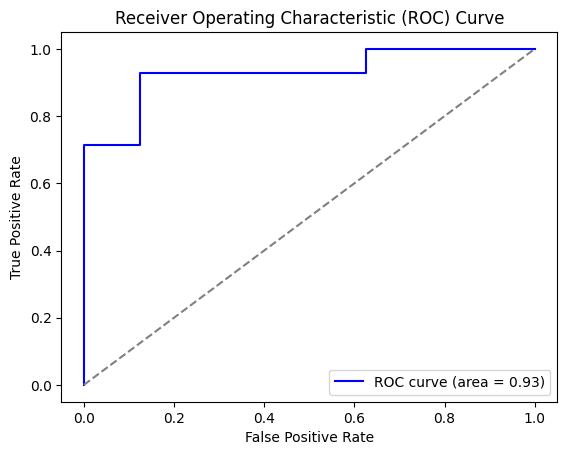

In [17]:
# Plot ROC curve
import matplotlib.pyplot as plt

fpr, tpr, _ = roc_curve(y_test, y_proba)
plt.figure()
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()